<h1 align=center> Exploratory Data Analysis

### New York City Taxi trip Records

Exploración de los datos obtenidos del NYC (New York City Taxi & Limusine Commission) [https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page] 
sobre recorridos de taxis amarillos y verdes en Nueva York año 2019

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Archivo yellow_tripdata_2019_12.parquet

In [3]:
df1 = pd.read_parquet(r'C:\Users\migue\Downloads\yellow_tripdata_2019-12.parquet', engine='pyarrow')
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.20,1.0,N,142,116,2,14.50,3.00,0.5,0.0,0.00,0.3,18.30,2.5,None
1,1,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.00,1.0,N,145,145,2,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0,None
2,1,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.00,1.0,N,145,145,2,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0,None
3,1,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1,28.50,0.50,0.5,10.0,0.00,0.3,39.80,0.0,None
4,1,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.60,1.0,N,161,237,2,9.00,3.00,0.5,0.0,0.00,0.3,12.80,2.5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896312,2,2019-12-31 23:56:29,2020-01-01 00:11:17,NaN,2.82,NaN,None,143,141,0,18.95,2.75,0.0,0.0,0.00,0.3,22.00,NaN,None
6896313,2,2019-12-31 23:11:53,2019-12-31 23:30:56,NaN,3.75,NaN,None,148,246,0,22.45,2.75,0.0,0.0,0.00,0.3,25.50,NaN,None
6896314,2,2019-12-31 23:57:21,2020-01-01 00:23:34,NaN,6.46,NaN,None,197,205,0,34.86,2.75,0.0,0.0,0.00,0.3,37.91,NaN,None
6896315,2,2019-12-31 23:37:29,2020-01-01 00:28:21,NaN,5.66,NaN,None,90,74,0,36.45,2.75,0.0,0.0,0.00,0.3,39.50,NaN,None


Observamos 6.8 millones de viajes registrados, con información en 19 columnas que abarca desde tiempo y localización de comienzo y fin del viaje, como distancia, tarifas y cobros extras

In [4]:
df1.isna().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            51018
trip_distance                  0
RatecodeID                 51018
store_and_fwd_flag         51018
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       51018
airport_fee              6896317
dtype: int64

Observamos una gran cantidad de nulos representando 51mil viajes donde no se registró cantidad de pasajeros, flag, ni otros cargos. Sin embargo datos importantes como distancia y tarifa están presentes. Airport_fee es columna nula en todo el dataset

In [25]:
duplicated_rows = df1[df1.duplicated()]
duplicated_rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


No hay datos duplicados. Se deciden conservar las 19 columnas por su utilidad para el análisis

In [26]:
df1.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

Notamos que los tipo de dato están acorde a la información que contienen

In [27]:
df1.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.896317e+06,6896317,6896317,6.845299e+06,6.896317e+06,6.845299e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.845299e+06
mean,1.668928e+00,2019-12-15 10:13:03.562443,2019-12-15 10:31:37.347177,1.550877e+00,2.973421e+00,1.065756e+00,1.636525e+02,1.614892e+02,1.289383e+00,1.359027e+01,1.108518e+00,4.924147e-01,2.244620e+00,3.881238e-01,2.979857e-01,1.964165e+01,2.292162e+00
min,1.000000e+00,2008-12-31 18:13:42,2008-12-31 18:27:42,0.000000e+00,-3.726453e+04,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.472000e+03,-4.500000e+00,-5.000000e-01,-2.008000e+02,-4.050000e+01,-3.000000e-01,-1.472800e+03,-2.500000e+00
25%,1.000000e+00,2019-12-08 01:23:20,2019-12-08 01:39:18,1.000000e+00,9.600000e-01,1.000000e+00,1.250000e+02,1.120000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,2.000000e+00,2019-12-14 21:12:06,2019-12-14 21:31:32,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.480000e+01,2.500000e+00
75%,2.000000e+00,2019-12-21 15:46:24,2019-12-21 16:03:08,2.000000e+00,3.030000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.543000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.135000e+01,2.500000e+00
max,5.000000e+00,2090-12-31 06:41:26,2090-12-31 07:18:49,9.000000e+00,1.913018e+04,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.984684e+05,9.006000e+01,3.300000e+00,4.044400e+02,6.126600e+02,3.000000e-01,3.984712e+05,3.000000e+00
std,4.706138e-01,NaN,NaN,1.174330e+00,1.643113e+01,9.309870e-01,6.605758e+01,7.033753e+01,4.987132e-01,1.522692e+02,1.259892e+00,7.233857e-02,2.875127e+00,1.715502e+00,3.381444e-02,1.525236e+02,7.120162e-01


Notamos que existen mínimo y máximo que no tienen sentido en columnas como tpep_pickup_datetime, trip_distance y total_amount. <br> No pueden haber distancias ni cobros negativos ni tampoco fechas fuera de Diciembre 2019

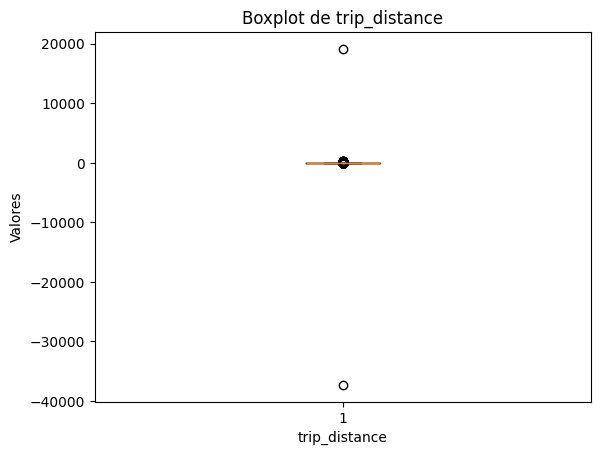

In [28]:
plt.boxplot(df1['trip_distance'])
plt.title('Boxplot de trip_distance')
plt.xlabel('trip_distance')
plt.ylabel('Valores')
plt.show()

confirmamos visualmente que existen datos erróneos en el dataset en la columna 'trip_distance'

Revisamos datos que tengan distancia negativa o mayor a 50 km

In [6]:
outliers = df1[(df1['trip_distance'] < 0) | (df1['trip_distance'] > 50)]
outliers

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
13682,2,2019-12-01 00:59:57,2019-12-01 02:01:09,5.0,52.04,1.0,N,132,265,2,133.00,0.50,0.5,0.0,7.78,0.3,142.08,0.0,None
59299,2,2019-12-01 11:38:57,2019-12-01 13:13:25,1.0,70.43,4.0,N,132,265,2,296.00,0.00,0.5,0.0,18.62,0.3,315.42,0.0,None
80463,2,2019-12-01 13:21:06,2019-12-01 13:24:41,1.0,-2.29,5.0,N,124,216,4,-26.92,0.00,0.5,0.0,0.00,0.3,-26.12,0.0,None
80464,2,2019-12-01 13:21:06,2019-12-01 13:24:41,1.0,-2.29,5.0,N,124,216,2,25.32,0.00,0.5,0.0,0.00,0.3,26.12,0.0,None
86549,1,2019-12-01 13:43:35,2019-12-01 15:28:27,1.0,66.20,4.0,N,132,265,2,283.00,0.00,0.5,0.0,11.12,0.3,294.92,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896272,2,2019-12-31 22:11:00,2019-12-31 22:40:00,NaN,-12.16,NaN,None,164,131,0,38.02,2.75,0.5,0.0,6.12,0.3,47.69,NaN,None
6896274,2,2019-12-31 22:48:00,2019-12-31 23:33:00,NaN,-15.46,NaN,None,215,68,0,47.68,2.75,0.5,0.0,6.12,0.3,57.35,NaN,None
6896275,2,2019-12-31 22:18:00,2019-12-31 22:33:00,NaN,-1.57,NaN,None,72,188,0,13.45,2.75,0.5,0.0,0.00,0.3,17.00,NaN,None
6896290,2,2019-12-31 22:04:00,2019-12-31 22:34:00,NaN,-3.49,NaN,None,89,97,0,21.95,2.75,0.5,0.0,0.00,0.3,25.50,NaN,None


Eliminamos los 3727 registros con distancias negativas o mayores a 50 km

In [7]:
df1 = df1[(df1['trip_distance'] > 0) & (df1['trip_distance'] <= 70)]

Analizamos la otra columna principal, que es total_amount

In [12]:
outliers = df1[(df1['total_amount'] < 0) | (df1['total_amount'] > 500)]
outliers

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
708,2,2019-12-01 00:07:31,2019-12-01 00:24:55,1.0,5.76,1.0,N,163,116,4,-20.00,-0.50,-0.5,0.0,0.0,-0.3,-23.80,-2.5,None
1108,2,2019-12-01 00:01:55,2019-12-01 00:03:52,5.0,0.18,1.0,N,65,65,3,-3.50,-0.50,-0.5,0.0,0.0,-0.3,-4.80,0.0,None
1309,2,2019-12-01 00:09:47,2019-12-01 00:26:51,1.0,3.93,1.0,N,229,7,4,-15.50,-0.50,-0.5,0.0,0.0,-0.3,-19.30,-2.5,None
1688,2,2019-12-01 00:54:27,2019-12-01 00:56:10,1.0,0.78,1.0,N,90,100,3,-4.00,-0.50,-0.5,0.0,0.0,-0.3,-7.80,-2.5,None
1766,2,2019-12-01 00:40:46,2019-12-01 00:48:19,1.0,2.21,1.0,N,263,233,4,-8.50,-0.50,-0.5,0.0,0.0,-0.3,-12.30,-2.5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6863751,2,2019-12-12 08:38:11,2019-12-12 08:45:23,NaN,0.78,NaN,None,231,114,0,-20.25,2.75,0.0,0.0,0.0,0.3,-17.20,NaN,None
6864273,2,2019-12-12 13:47:00,2019-12-12 14:04:00,NaN,2.31,NaN,None,226,229,0,-30.66,2.75,0.5,0.0,0.0,0.3,-27.11,NaN,None
6886396,2,2019-12-24 16:41:10,2019-12-24 16:41:00,NaN,0.06,NaN,None,49,49,0,-9.36,0.00,-0.5,0.0,0.0,-0.3,-10.16,NaN,None
6888400,2,2019-12-26 11:34:00,2019-12-26 11:36:00,NaN,0.42,NaN,None,16,16,0,-28.07,2.75,0.5,0.0,0.0,0.3,-24.52,NaN,None


Se deciden eliminar los 18362 registros con tarifa total negativa o mayor a 500 dólares

In [32]:
df1 = df1[(df1['total_amount'] > 0) & (df1['total_amount'] <= 500)]

Volvemos a analizar la columna trip_distance

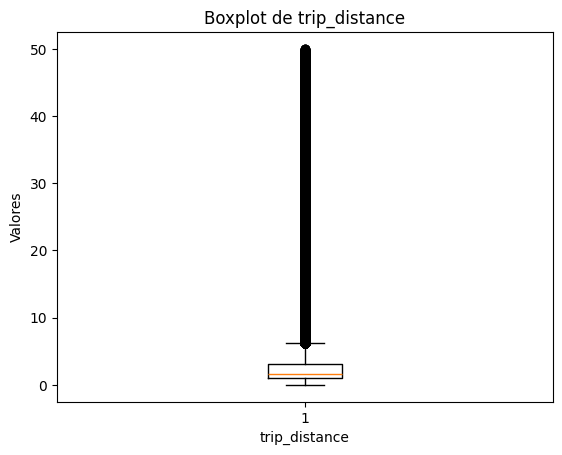

In [33]:
plt.boxplot(df1['trip_distance'])
plt.title('Boxplot de trip_distance')
plt.xlabel('trip_distance')
plt.ylabel('Valores')
plt.show()

Vemos que el IQR es pequeño, debido a que la mayoría de los viajes en taxis son por distancias cortas, sin embargo existen viajes de todas las distancias hasta 50 km, se decide mantener

In [34]:
df1.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.804020e+06,6804020,6804020,6.756540e+06,6.804020e+06,6.756540e+06,6.804020e+06,6.804020e+06,6.804020e+06,6.804020e+06,6.804020e+06,6.804020e+06,6.804020e+06,6.804020e+06,6.804020e+06,6.804020e+06,6.756540e+06
mean,1.669581e+00,2019-12-15 10:14:06.805217,2019-12-15 10:32:44.961207,1.553496e+00,3.011360e+00,1.049192e+00,1.637114e+02,1.614037e+02,1.281983e+00,1.342949e+01,1.117615e+00,4.965048e-01,2.242886e+00,3.842239e-01,2.999284e-01,1.951264e+01,2.320499e+00
min,1.000000e+00,2008-12-31 18:13:42,2008-12-31 18:27:42,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.210000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000e-01,3.000000e-01,0.000000e+00
25%,1.000000e+00,2019-12-08 01:17:22,2019-12-08 01:33:33,1.000000e+00,9.900000e-01,1.000000e+00,1.250000e+02,1.120000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,2.000000e+00,2019-12-14 21:09:22.500000,2019-12-14 21:28:46,1.000000e+00,1.630000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.480000e+01,2.500000e+00
75%,2.000000e+00,2019-12-21 15:40:59.250000,2019-12-21 15:57:55.250000,2.000000e+00,3.070000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.500000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.130000e+01,2.500000e+00
max,5.000000e+00,2090-12-31 06:41:26,2090-12-31 07:18:49,9.000000e+00,4.999000e+01,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.990000e+02,9.006000e+01,3.300000e+00,4.044400e+02,2.000300e+02,3.000000e-01,4.993000e+02,3.000000e+00
std,4.703792e-01,NaN,NaN,1.176976e+00,3.899122e+00,6.812148e-01,6.597331e+01,7.024158e+01,4.818281e-01,1.174169e+01,1.255810e+00,4.181503e-02,2.788876e+00,1.677296e+00,4.638531e-03,1.453957e+01,6.453936e-01


Observamos que en las fechas tenemos desde 2008 hasta 2090, que no corresponden a este dataset. Se observan outliers en fecha

In [35]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
start_date = pd.to_datetime('2019-12-01')
end_date = pd.to_datetime('2019-12-31 23:59:59')

# Filtrar registros anteriores o posteriores a diciembre de 2019
df_filtrado = df1[(df1['tpep_pickup_datetime'] < start_date) | (df1['tpep_pickup_datetime'] > end_date)]
df_filtrado



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
11,2,2019-11-30 23:54:45,2019-12-01 00:09:57,1.0,2.12,1.0,N,234,230,2,12.0,0.5,0.5,0.00,0.0,0.3,15.80,2.5,None
243,2,2019-11-30 23:58:03,2019-12-01 00:03:04,1.0,1.57,1.0,N,162,236,1,6.5,0.5,0.5,2.06,0.0,0.3,12.36,2.5,None
247,2,2019-11-30 23:55:07,2019-12-01 00:01:41,1.0,1.37,1.0,N,127,243,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80,0.0,None
517,2,2019-11-30 23:59:51,2019-12-01 00:16:37,1.0,3.30,1.0,N,144,162,2,13.5,0.5,0.5,0.00,0.0,0.3,17.30,2.5,None
559,2,2019-11-30 23:57:36,2019-12-01 00:01:56,1.0,0.71,1.0,N,231,13,2,5.0,0.5,0.5,0.00,0.0,0.3,8.80,2.5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838369,2,2020-01-01 00:03:35,2020-01-01 00:24:24,5.0,3.70,1.0,N,236,186,2,16.5,0.5,0.5,0.00,0.0,0.3,20.30,2.5,None
6839706,2,2020-01-01 00:00:06,2020-01-01 00:18:13,1.0,4.51,1.0,N,75,162,2,16.0,0.5,0.5,0.00,0.0,0.3,19.80,2.5,None
6842741,2,2020-01-01 00:03:25,2020-01-01 00:27:57,1.0,3.04,1.0,N,186,144,2,17.0,0.5,0.5,0.00,0.0,0.3,20.80,2.5,None
6843776,2,2020-01-01 00:00:46,2020-01-01 00:16:15,1.0,3.01,1.0,N,234,13,1,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,None


Se eliminan los 377 registros con fecha errónea

In [36]:
df1 = df1[(df1['tpep_pickup_datetime'] > start_date) & (df1['tpep_pickup_datetime'] <= end_date)]

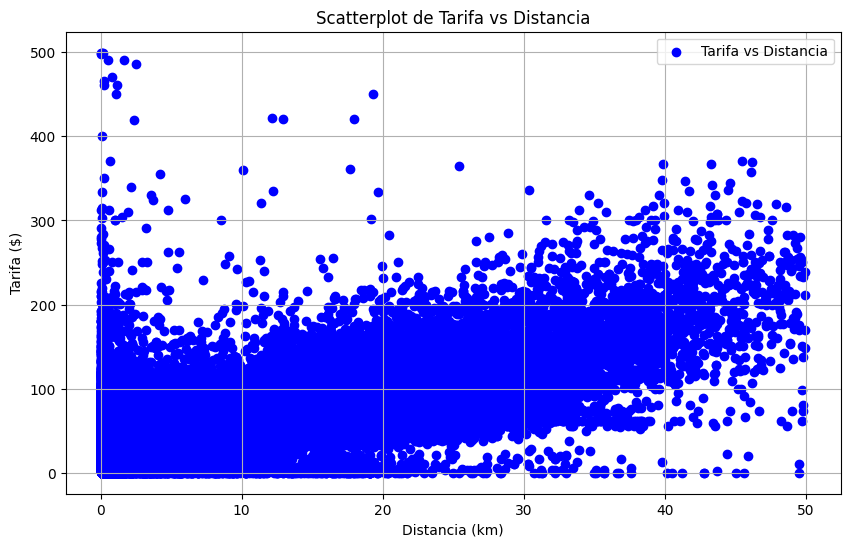

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['trip_distance'], df1['total_amount'], color='blue', label='Tarifa vs Distancia')
plt.title('Scatterplot de Tarifa vs Distancia')
plt.xlabel('Distancia (km)')
plt.ylabel('Tarifa ($)')
plt.legend()
plt.grid(True)
plt.show()

Vemos que hay cierta correlación entre distancia y tarifa, pero la correlación tiene varios outliers, como viajes cortos que gran tarifa o viajes largos casi sin cobro

### Observamos la distribución de viajes por día de la semana

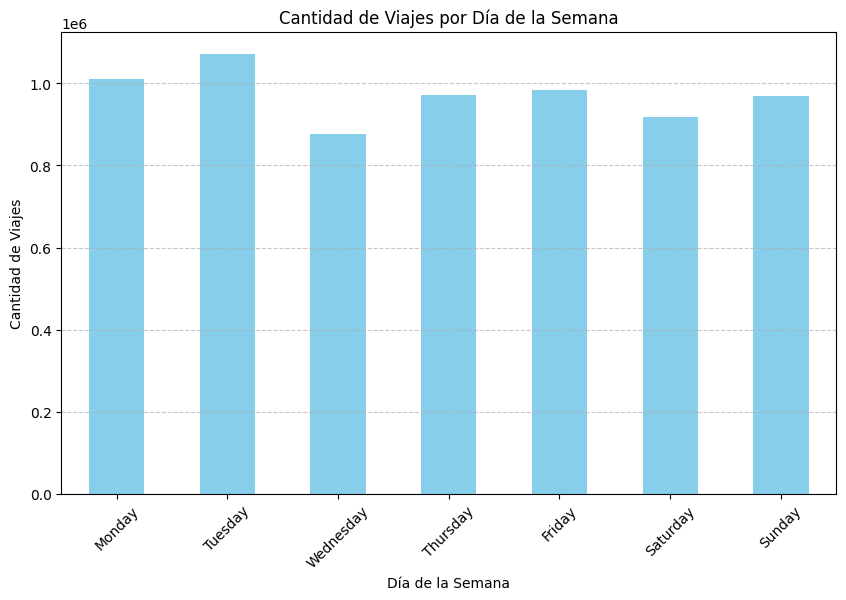

In [38]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

# Extraer el día de la semana
df1['día_semana'] = df1['tpep_pickup_datetime'].dt.day_name()

# Contar la cantidad de viajes por día de la semana
viajes_por_dia = df1['día_semana'].value_counts()

# Ordenar los días de la semana
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
viajes_por_dia = viajes_por_dia.reindex(orden_dias, fill_value=0)

# Crear el histograma
plt.figure(figsize=(10, 6))
viajes_por_dia.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Viajes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Vemos que los viajes se reparten homogeneamente, siendo Martes el día de mayor toma de pasajeros y Miércoles el menor

## 2. Archivo green_tripdate_2019_12.parquet

In [40]:
df2 = pd.read_parquet(r'C:\Users\migue\Downloads\green_tripdata_2019-12.parquet', engine='pyarrow')
df2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.00,0.50,0.5,0.00,0.0,None,0.3,4.30,2.0,1.0,0.0
1,2,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.50,0.50,0.5,2.04,0.0,None,0.3,8.84,1.0,1.0,0.0
2,2,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.50,0.50,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.0
3,2,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.00,0.50,0.5,0.00,0.0,None,0.3,15.30,2.0,1.0,0.0
4,2,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.50,0.50,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455289,2,2019-12-31 23:24:00,2019-12-31 23:40:00,None,NaN,185,247,NaN,9.35,22.09,0.00,0.0,0.00,0.0,None,0.3,22.39,NaN,NaN,NaN
455290,2,2019-12-31 23:16:00,2019-12-31 23:37:00,None,NaN,51,126,NaN,-7.16,35.95,2.75,0.5,0.00,0.0,None,0.3,39.50,NaN,NaN,NaN
455291,2,2019-12-31 23:16:00,2019-12-31 23:37:00,None,NaN,51,126,NaN,-7.16,16.87,0.00,0.5,0.00,0.0,None,0.3,17.67,NaN,NaN,NaN
455292,2,2019-12-31 23:52:00,2020-01-01 00:05:00,None,NaN,42,244,NaN,2.43,21.15,2.75,0.5,0.00,0.0,None,0.0,24.40,NaN,NaN,NaN


Observamos 455mil viajes en taxis verdes en diciembre 2019, en 20 columnas con información como pickup time, cantidad de pasajeros, distancia y tarifa

In [41]:
duplicated_rows = df2[df2.duplicated()]
duplicated_rows

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
311267,2,2019-12-27 12:05:00,2019-12-27 12:05:00,N,5.0,264,264,1.0,0.00,10.00,0.0,0.0,0.00,0.00,None,0.0,10.00,1.0,1.0,0.0
447719,2,2019-12-30 10:55:00,2019-12-30 10:58:00,None,NaN,165,165,NaN,0.34,13.34,0.0,0.0,0.00,0.00,None,0.3,13.64,NaN,NaN,NaN
447839,2,2019-12-30 11:11:00,2019-12-30 11:37:00,None,NaN,165,29,NaN,2.92,14.34,0.0,0.5,0.00,0.00,None,0.3,15.14,NaN,NaN,NaN
448091,2,2019-12-30 11:27:00,2019-12-30 11:27:00,None,NaN,18,18,NaN,0.01,10.08,0.0,0.0,0.00,0.00,None,0.3,10.38,NaN,NaN,NaN
448169,2,2019-12-30 11:29:00,2019-12-30 11:29:00,None,NaN,170,170,NaN,0.00,13.14,0.0,0.0,0.00,0.00,None,0.3,13.44,NaN,NaN,NaN
448515,2,2019-12-30 12:02:00,2019-12-30 12:02:00,None,NaN,62,62,NaN,0.00,24.29,0.0,0.0,0.00,0.00,None,0.3,24.59,NaN,NaN,NaN
448707,2,2019-12-30 13:24:00,2019-12-30 13:24:00,None,NaN,75,75,NaN,0.00,51.72,0.0,0.5,0.00,0.00,None,0.0,52.22,NaN,NaN,NaN
448857,2,2019-12-30 13:58:00,2019-12-30 13:59:00,None,NaN,28,28,NaN,0.00,8.00,0.0,0.0,0.00,0.00,None,0.3,8.30,NaN,NaN,NaN
449181,2,2019-12-30 14:48:00,2019-12-30 15:35:00,None,NaN,237,92,NaN,9.10,30.99,0.0,0.0,0.00,0.00,None,0.3,31.29,NaN,NaN,NaN
449371,2,2019-12-30 14:33:00,2019-12-30 14:33:00,None,NaN,26,26,NaN,0.00,18.12,0.0,0.0,0.00,0.00,None,0.3,18.42,NaN,NaN,NaN


Vemos una gran cantidad de datos duplicados, se eliminan

In [42]:
df2 = df2.drop_duplicates()

In [44]:
df2.isna().sum()

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        95353
RatecodeID                95353
PULocationID                  0
DOLocationID                  0
passenger_count           95353
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                455254
improvement_surcharge         2
total_amount                  0
payment_type              95353
trip_type                 95355
congestion_surcharge      95355
dtype: int64

Se elimina la columna ehail_fee por ser nula en toda la data, posiblemente un dato que no se está registrando aún. Vemos que los otros nulos son de columnas de baja relevancia

In [ ]:
df2 = df2.drop('ehail_fee', axis=1)

Existe cantidad de nulos en ciertas columnas, se decide dejar como dato faltante y no afectar el dataset, por mantener data relevante en trip_distance y total_amount

In [46]:
df2.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,455254.000000,455254,455254,359901.000000,455254.000000,455254.000000,359901.000000,455254.000000,455254.000000,455254.000000,455254.000000,455254.000000,455254.000000,455252.000000,455254.000000,359901.000000,359899.000000,359899.000000
mean,1.868333,2019-12-15 21:54:40.089921,2019-12-15 22:15:57.423614,1.102825,107.613069,128.436923,1.311583,3.477592,15.642273,0.879204,0.436031,0.939821,0.295310,0.270701,18.772601,1.477003,1.023226,0.426470
min,1.000000,2008-12-31 22:34:56,2008-12-31 22:42:10,1.000000,1.000000,1.000000,0.000000,-9436.330000,-200.000000,-4.500000,-0.500000,-90.500000,0.000000,-0.300000,-200.000000,1.000000,1.000000,-2.750000
25%,2.000000,2019-12-08 12:43:00,2019-12-08 13:03:00,1.000000,52.000000,63.000000,1.000000,1.040000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.800000,1.000000,1.000000,0.000000
50%,2.000000,2019-12-15 14:45:00,2019-12-15 15:04:36.500000,1.000000,82.000000,129.000000,1.000000,1.960000,11.380000,0.500000,0.500000,0.000000,0.000000,0.300000,14.160000,1.000000,1.000000,0.000000
75%,2.000000,2019-12-22 20:39:00,2019-12-22 21:00:20.750000,1.000000,166.000000,192.000000,1.000000,4.040000,20.500000,1.000000,0.500000,1.560000,0.000000,0.300000,24.420000,2.000000,1.000000,0.000000
max,2.000000,2035-09-02 17:17:47,2035-09-02 19:01:37,6.000000,265.000000,265.000000,9.000000,77843.760000,500.000000,8.250000,3.550000,441.000000,48.000000,0.300000,500.300000,5.000000,2.000000,2.750000
std,0.338129,NaN,NaN,0.623098,70.680236,76.077687,0.968108,116.463040,12.924251,1.164233,0.170568,2.173384,1.380854,0.091335,14.404784,0.521521,0.150621,0.995452


Se revisan outliers en columnas 'pickup time', 'trip_distance' y 'total_amount'

In [48]:
df2['lpep_pickup_datetime'] = pd.to_datetime(df2['lpep_pickup_datetime'])
start_date = pd.to_datetime('2019-12-01')
end_date = pd.to_datetime('2019-12-31 23:59:59')

# Filtrar registros anteriores o posteriores a diciembre de 2019
df_filtrado = df2[(df2['lpep_pickup_datetime'] < start_date) | (df2['lpep_pickup_datetime'] > end_date)]
df_filtrado

C:\Users\migue\AppData\Local\Temp\ipykernel_264\2019628494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lpep_pickup_datetime'] = pd.to_datetime(df2['lpep_pickup_datetime'])


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
40,2,2019-11-30 23:52:27,2019-12-01 00:00:49,N,1.0,247,42,1.0,1.62,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,1.0,1.0,0.0
145,2,2019-11-30 23:07:14,2019-11-30 23:24:30,N,1.0,75,159,1.0,3.46,14.0,0.5,0.5,0.00,0.0,None,0.3,15.30,2.0,1.0,0.0
146,2,2019-11-30 23:30:50,2019-11-30 23:37:03,N,1.0,168,126,1.0,1.35,6.5,0.5,0.5,0.00,0.0,None,0.3,7.80,2.0,1.0,0.0
211,2,2019-11-30 21:22:12,2019-11-30 21:28:23,N,1.0,74,41,1.0,0.81,6.0,0.5,0.5,0.00,0.0,None,0.3,7.30,2.0,1.0,0.0
212,2,2019-11-30 21:30:47,2019-11-30 21:36:42,N,1.0,41,41,1.0,0.92,6.0,0.5,0.5,0.00,0.0,None,0.3,7.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359586,2,2020-01-01 11:24:35,2020-01-01 11:43:23,N,1.0,223,82,1.0,6.85,22.0,0.5,0.5,0.00,0.0,None,0.3,23.30,2.0,1.0,0.0
359587,2,2020-01-01 11:58:00,2020-01-01 12:25:15,N,1.0,82,132,1.0,12.24,36.0,0.5,0.5,7.46,0.0,None,0.3,44.76,1.0,1.0,0.0
359602,2,2020-01-01 00:06:39,2020-01-01 00:09:26,N,1.0,181,181,1.0,0.43,4.0,0.5,0.5,0.00,0.0,None,0.3,5.30,2.0,1.0,0.0
359645,2,2020-01-01 00:00:01,2020-01-01 00:09:21,N,1.0,74,75,6.0,1.55,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.0


62 registros con fechas fuera de lo establecido. Se eliminan

In [49]:
df2 = df2[(df2['lpep_pickup_datetime'] > start_date) & (df2['lpep_pickup_datetime'] <= end_date)]

Se observan registros que tengan trip_distance negativa  o mayor a 50km

In [51]:
outliers = df2[(df2['trip_distance'] < 0) | (df2['trip_distance'] > 50)]
outliers

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
33122,2,2019-12-04 04:51:16,2019-12-04 17:37:48,N,1.0,210,264,1.0,57.63,157.00,0.50,0.5,0.0,6.12,None,0.3,168.32,2.0,1.0,0.0
38473,2,2019-12-04 15:51:37,2019-12-04 21:21:46,N,1.0,123,55,1.0,63.87,258.00,0.00,0.5,0.0,0.00,None,0.3,258.80,2.0,1.0,0.0
44000,1,2019-12-04 22:07:00,2019-12-05 00:06:48,N,5.0,244,265,1.0,74.60,100.00,0.00,0.0,0.0,10.50,None,0.0,110.50,4.0,2.0,0.0
53668,2,2019-12-05 18:01:22,2019-12-05 18:07:37,N,5.0,193,145,1.0,-1.39,10.74,0.00,0.5,1.0,0.00,None,0.3,14.48,1.0,1.0,0.0
58766,1,2019-12-06 05:34:14,2019-12-06 07:10:27,N,5.0,166,265,1.0,59.70,0.00,0.00,0.0,0.0,35.50,None,0.0,35.50,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454737,2,2019-12-31 20:16:00,2019-12-31 20:27:00,None,NaN,16,64,NaN,-2.91,10.24,0.00,0.5,0.0,0.00,None,0.3,11.04,NaN,NaN,NaN
454742,2,2019-12-31 20:42:00,2019-12-31 21:11:00,None,NaN,244,32,NaN,-6.38,32.45,2.75,0.5,0.0,0.00,None,0.3,36.00,NaN,NaN,NaN
454743,2,2019-12-31 20:42:00,2019-12-31 21:11:00,None,NaN,244,32,NaN,-6.38,19.24,0.00,0.5,0.0,0.00,None,0.3,20.04,NaN,NaN,NaN
455290,2,2019-12-31 23:16:00,2019-12-31 23:37:00,None,NaN,51,126,NaN,-7.16,35.95,2.75,0.5,0.0,0.00,None,0.3,39.50,NaN,NaN,NaN


Se borran los 3169 registros con trip_distance fuera del margen

In [52]:
df2 = df2[(df2['trip_distance'] > 0) & (df2['trip_distance'] <= 50)]

Se analizan registros con 'total_amount' negativo o mayor a 500 dólares

In [54]:
outliers = df2[(df2['total_amount'] < 0) | (df2['total_amount'] > 500)]
outliers

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
58,2,2019-12-01 00:35:40,2019-12-01 00:37:54,N,1.0,80,80,1.0,0.44,-3.50,-0.50,-0.5,0.0,0.0,None,-0.3,-4.80,3.0,1.0,0.0
410,2,2019-12-01 00:36:26,2019-12-01 00:42:22,N,1.0,112,112,5.0,0.58,-4.00,-0.50,-0.5,0.0,0.0,None,-0.3,-5.30,4.0,1.0,0.0
842,2,2019-12-01 02:00:06,2019-12-01 02:05:41,N,1.0,255,112,1.0,0.71,-5.50,-0.50,-0.5,0.0,0.0,None,-0.3,-6.80,3.0,1.0,0.0
1114,2,2019-12-01 03:38:45,2019-12-01 03:40:16,N,1.0,36,80,1.0,0.23,-3.00,-0.50,-0.5,0.0,0.0,None,-0.3,-4.30,3.0,1.0,0.0
1168,2,2019-12-01 03:54:54,2019-12-01 03:55:28,N,1.0,82,129,1.0,0.01,-2.50,-0.50,-0.5,0.0,0.0,None,-0.3,-3.80,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399403,2,2019-12-12 19:29:00,2019-12-12 19:37:00,None,NaN,61,17,NaN,1.14,-22.83,2.75,0.0,0.0,0.0,None,0.3,-19.78,NaN,NaN,NaN
400935,2,2019-12-13 10:31:00,2019-12-13 10:38:00,None,NaN,61,61,NaN,0.72,-23.03,2.75,0.5,0.0,0.0,None,0.0,-19.78,NaN,NaN,NaN
406564,2,2019-12-15 10:06:00,2019-12-15 10:12:00,None,NaN,168,168,NaN,0.61,-27.37,5.50,0.0,0.0,0.0,None,0.3,-21.57,NaN,NaN,NaN
411914,2,2019-12-16 21:03:10,2019-12-16 21:05:00,None,NaN,95,95,NaN,0.33,-36.40,0.00,0.5,0.0,0.0,None,0.3,-35.90,NaN,NaN,NaN


Se eliminan los 844 registros con total_amount negativo o mayor a 500 dolares

In [55]:
df2 = df2[(df2['total_amount'] > 0) & (df2['total_amount'] <= 500)]

In [56]:
df2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1,2,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.50,0.50,0.5,2.04,0.0,None,0.3,8.84,1.0,1.0,0.0
2,2,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.50,0.50,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.0
3,2,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.00,0.50,0.5,0.00,0.0,None,0.3,15.30,2.0,1.0,0.0
4,2,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.50,0.50,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.0
5,1,2019-12-01 00:14:28,2019-12-01 00:19:39,N,1.0,21,123,1.0,1.10,6.00,0.50,0.5,0.00,0.0,None,0.3,7.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455287,2,2019-12-31 23:02:00,2019-12-31 23:16:00,None,NaN,76,61,NaN,2.27,8.34,0.00,0.0,0.00,0.0,None,0.3,8.64,NaN,NaN,NaN
455288,2,2019-12-31 23:24:00,2019-12-31 23:40:00,None,NaN,185,247,NaN,9.35,27.27,2.75,0.0,0.00,0.0,None,0.3,30.32,NaN,NaN,NaN
455289,2,2019-12-31 23:24:00,2019-12-31 23:40:00,None,NaN,185,247,NaN,9.35,22.09,0.00,0.0,0.00,0.0,None,0.3,22.39,NaN,NaN,NaN
455292,2,2019-12-31 23:52:00,2020-01-01 00:05:00,None,NaN,42,244,NaN,2.43,21.15,2.75,0.5,0.00,0.0,None,0.0,24.40,NaN,NaN,NaN
